<h1>
Week 1
</h1>

<h2>
Task 1: Estimating Derivatives
</h2>

<h3>
The goal in this notebook is to get comfortable with using finite difference methods to approximate differentiation
</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

<p style="font-size:20px;">
Let's choose a function that we know the derivative of, and we will try to estimate it
</p>

In [2]:
def func(x):
    return x**3

def func_prime(x):
    return 3*x**2

<p style="font-size:20px;">
Remember a derivative is defined as
    $$ \frac{{\rm d}f}{{\rm d}x} = \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}. $$
Taking a formal limit to 0 however is the luxury of "pen and paper" mathematics. In computational tasks we must settle for sufficiently small.
    $$ \frac{{\rm d}f}{{\rm d}x} \approx \frac{f(x+\delta x) - f(x)}{\delta x}. $$
</p>

In [6]:
x = 5
delta_x = 10**-4

print(f"Analytic derivative:    {func_prime(x)}")
print(f"Approximate derivative: {(func(x + delta_x/2) - func(x - delta_x/2)) / delta_x}")

Analytic derivative:    75
Approximate derivative: 75.00000000234763


<p style="font-size:20px;color:Blue;">
$\cdot$ How small should we make $\delta x$ to get the right derivative at the second decimal place?
<br>
$\cdot$ Repeat the same process at $x=5$. Can you explain the difference?
</p>

<p style="font-size:20px;">
One problem is that our function is always growing. This means stepping forward an amount $\delta x$ makes us land on a section of the curve with larger gradient. We can remedy this by making our numerical derivative step backwards a bit too:
    $$ \frac{{\rm d}f}{{\rm d}x} \approx \frac{f(x+\delta x/2) - f(x-\delta x/2)}{\delta x}. $$
</p>

<p style="font-size:20px;color:Blue;">
Use this new definition to repeat the above tasks.
</p>

<p style="font-size:20px;">
This is an example of how mathematically equivalent statements can give very different computational considerations. Analytically we always take a formal limit to 0, while in our code we need to make it "small enough". Some formulations of a problem become "small enough" faster than others.
</p>
<p style="font-size:20px;">
Let's visualise this concept of convergence. We start by wrapping the above definitions into easy to use functions.
</p>

In [4]:
def forward_derivative(func, x, dx):
    return (func(x+dx)-func(x))/dx

def backward_derivative(func, x, dx):
    return (func(x)-func(x-dx))/dx

def midpoint_derivative(func, x, dx):
    return (func(x+dx/2)-func(x-dx/2))/dx

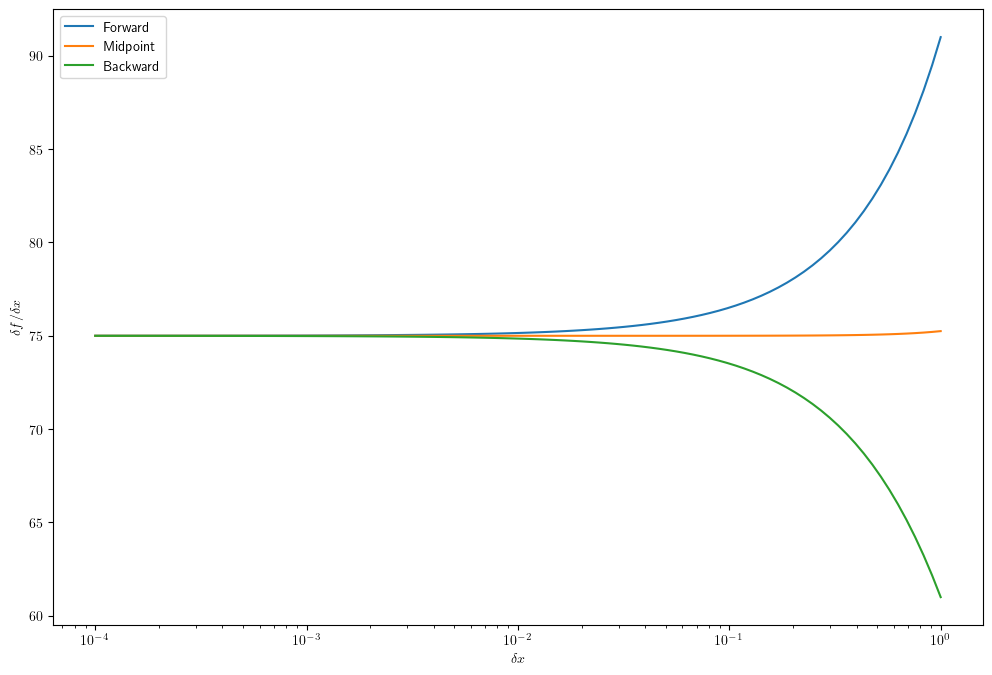

<Figure size 640x480 with 0 Axes>

In [5]:
func = lambda x: x**3
x = 5
dxs = np.geomspace(0.0001, 1, 100)

fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$\delta x$", ylabel=r"$\delta f / \delta x$", xscale="log")

ax.plot(dxs, forward_derivative(func, 5, dxs), label="Forward")
ax.plot(dxs, midpoint_derivative(func, 5, dxs), label="Midpoint")
ax.plot(dxs, backward_derivative(func, 5, dxs), label="Backward")

ax.legend()

plt.show()
plt.clf()

<p style="font-size:20px;">
The midpoint derivative converges to the correct answer much faster than the other two.
</p>

<p style="font-size:20px;">
Let's use this method to visualise derivatives across an entire domain.
</p>

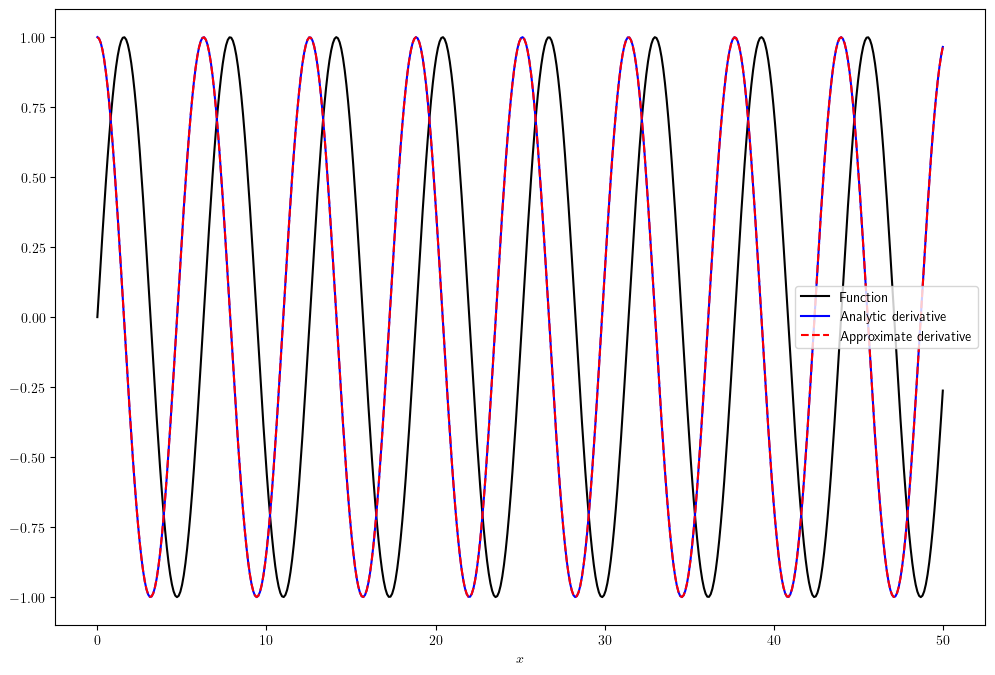

<Figure size 640x480 with 0 Axes>

In [7]:
func = lambda x: np.sin(x)
func_prime = lambda x: np.cos(x)

x_values = np.linspace(0, 50, 500)
dx = 0.1

fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$x$")

ax.plot(x_values, func(x_values), color="black", label="Function")
ax.plot(x_values, func_prime(x_values),
        color="blue", linestyle="-", label="Analytic derivative")
ax.plot(x_values, midpoint_derivative(func, x_values, dx),
        color="red", linestyle="--", label="Approximate derivative")


ax.legend()

plt.show()
plt.clf()

<p style="font-size:20px;">
We can use this method to estimate derivatives where we can't (or don't want to) do so analytically. Play around with the following badly behaved function. Notice that we need smaller $\delta x$ for those low $x$ values in the function 
</p>

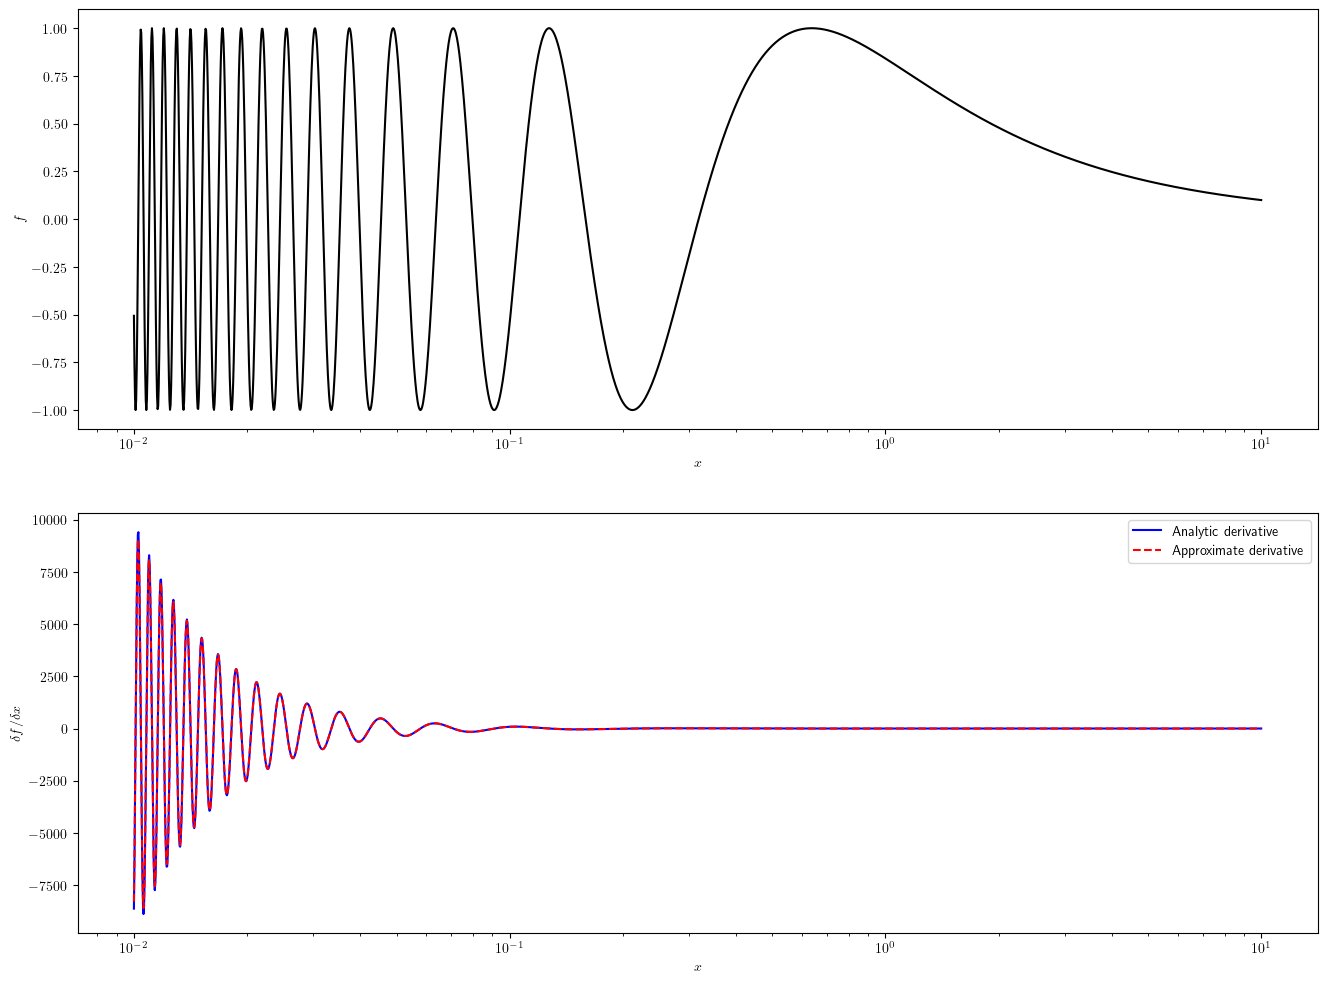

<Figure size 640x480 with 0 Axes>

In [9]:
func = lambda x: np.sin(1/x)
func_prime = lambda x: -np.cos(1/x)/x**2

x_values = np.geomspace(0.01, 10, 2000)
dx = 10**-4

fig, [ax1, ax2] = plt.subplots(2, figsize=(16,12))
ax1.set(xlabel=r"$x$", ylabel=r"$f$", xscale="log")
ax2.set(xlabel=r"$x$", ylabel=r"$\delta f / \delta x$", xscale="log")

ax1.plot(x_values, func(x_values), color="black")

ax2.plot(x_values, func_prime(x_values),
        color="blue", linestyle="-", label="Analytic derivative")
ax2.plot(x_values, midpoint_derivative(func, x_values, dx),
        color="red", linestyle="--", label="Approximate derivative")


ax2.legend()

plt.show()
plt.clf()